# TikTok Project
**Phase 1 - Inspect and Analyze Data**

**The purpose** of this project is to investigate and understand the data provided. In this activity I will:

1.   Acquaint with the data
2.   Compile summary information about the data
3.   Begin the process of EDA and reveal insights contained in the data
4.   Prepare for more in-depth EDA, hypothesis testing, and statistical analysis

**The goal** is to construct a dataframe in Python, perform a cursory inspection of the provided dataset, and inform TikTok data team members of my findings.
<br/>

## Understand the Data

* How can I best prepare to understand and organize the provided information?
*Prepare by reading in the data, viewing the data dictionary, and exploring the dataset to identify key variables for the stakeholder.*

In [26]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("tiktok_dataset.csv")

**Question 1:** When reviewing the first few rows of the dataframe, what do you observe about the data? What does each row represent?

**Question 2:** When reviewing the `data.info()` output, what do you notice about the different variables? Are there any null values? Are all of the variables numeric? Does anything else stand out?

**Question 3:** When reviewing the `data.describe()` output, what do you notice about the distributions of each variable? Are there any questionable values? Does it seem that there are outlier values?

In [5]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [7]:
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


**Responses:**

**Question 1:** The dataframe contains a collection of categorical, text, and numerical data. Each row represents a distinct TikTok video that presents either a claim or an opinion and the accompanying metadata about that video.

**Question 2:** The dataframe contains five float64s, three int64s, and four objects. There are 19,382 observations, but some of the variables are missing values, including claim status, the video transcripton, and all of the count variables.

**Question 3:** Many of the count variables seem to have outliers at the high end of the distribution. They have very large standard deviations and maximum values that are very high compared to their quartile values.

## Investigate the variables

The ultimate objective of this project is to use machine learning to classify videos as either claims or opinions. A good first step towards understanding the data might therefore be examining the `claim_status` variable. Let's begin by determining how many videos there are for each different claim status.

In [8]:
data['claim_status'].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

The counts of each claim status are quite balanced.

In [9]:
# What is the average view count of videos with "claim" status?
claims = data[data['claim_status'] == 'claim']
print('Mean view count claims:', claims['video_view_count'].mean())
print('Median view count claims:', claims['video_view_count'].median())

# What is the average view count of videos with "opinion" status?
opinions = data[data['claim_status'] == 'opinion']
print('\nMean view count opinions:', opinions['video_view_count'].mean())
print('Median view count opinions:', opinions['video_view_count'].median())

Mean view count claims: 501029.4527477102
Median view count claims: 501555.0

Mean view count opinions: 4956.43224989447
Median view count opinions: 4953.0


The mean and the median within each claim category are close to one another, but there is a vast discrepancy between view counts for videos labeled as claims and videos labeled as opinions.

In [10]:
# Get counts for each group combination of claim_status and author_ban_status

data.groupby(['claim_status', 'author_ban_status']).count()[['#']]

#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

There are many more claim videos with banned authors than there are opinion videos with banned authors. This could mean a number of things, including the possibilities that:
* Claim videos are more strictly policed than opinion videos
* Authors must comply with a stricter set of rules if they post a claim than if they post an opinion

Also, it should be noted that there's no way of knowing if claim videos are inherently more likely than opinion videos to result in author bans, or if authors who post claim videos are more likely to post videos that violate terms of service.

Finally, while we can use this data to draw conclusions about banned/active authors, we cannot draw conclusions about banned videos. There's no way of determining whether a particular video _caused_ the ban, and banned authors could have posted videos that complied with the terms of service.

In [40]:
# What's the mean and median of video_view_count, video_like_count and video_share_count of each author_ban_status?

g= data.groupby(['author_ban_status']).agg(
    {'video_view_count': ['mean', 'median'],
     'video_like_count': ['mean', 'median'],
     'video_share_count': ['mean', 'median']}).round()
g

video_view_count           video_like_count            \
                              mean    median             mean    median   
author_ban_status                                                         
active                    215927.0    8616.0          71037.0    2222.0   
banned                    445845.0  448201.0         153017.0  105573.0   
under review              392205.0  365246.0         128718.0   71204.0   

                  video_share_count           
                               mean   median  
author_ban_status                             
active                      14111.0    437.0  
banned                      29999.0  14468.0  
under review                25775.0   9444.0

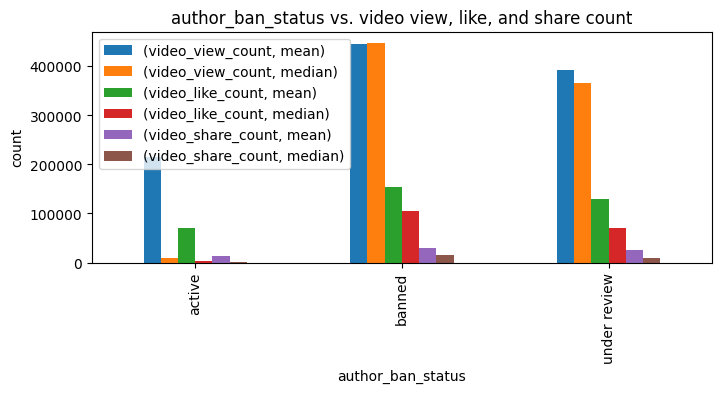

In [41]:
g.plot(kind='bar', figsize=(8,3))
plt.ylabel('count')
plt.legend()
plt.title('author_ban_status vs. video view, like, and share count');

A few observations stand out:
* Banned authors and those under review get far more views, likes, and shares than active authors.
* In most groups, the mean is much greater than the median, which indicates that there are some videos with very high engagement counts.

In [42]:
# Create a likes_per_view column
data['likes_per_view'] = data['video_like_count'] / data['video_view_count']

# Create a comments_per_view column
data['comments_per_view'] = data['video_comment_count'] / data['video_view_count']

# Create a shares_per_view column
data['shares_per_view'] = data['video_share_count'] / data['video_view_count']

In [43]:
g2 = data.groupby(['claim_status', 'author_ban_status']).agg(
    {'likes_per_view': ['mean', 'median'],
     'comments_per_view': ['mean', 'median'],
     'shares_per_view': ['mean', 'median']})
g2

likes_per_view           comments_per_view  \
                                         mean    median              mean   
claim_status author_ban_status                                              
claim        active                  0.329542  0.326538          0.001393   
             banned                  0.345071  0.358909          0.001377   
             under review            0.327997  0.320867          0.001367   
opinion      active                  0.219744  0.218330          0.000517   
             banned                  0.206868  0.198483          0.000434   
             under review            0.226394  0.228051          0.000536   

                                         shares_per_view            
                                  median            mean    median  
claim_status author_ban_status                                      
claim        active             0.000776        0.065456  0.049279  
             banned             0.000746        0.067893  0.051606  
             under review       0.000789        0.065733  0.049967  
opinion      active             0.000252        0.043729  0.032405  
             banned             0.000193        0.040531  0.030728  
             under review       0.000293        0.044472  0.035027

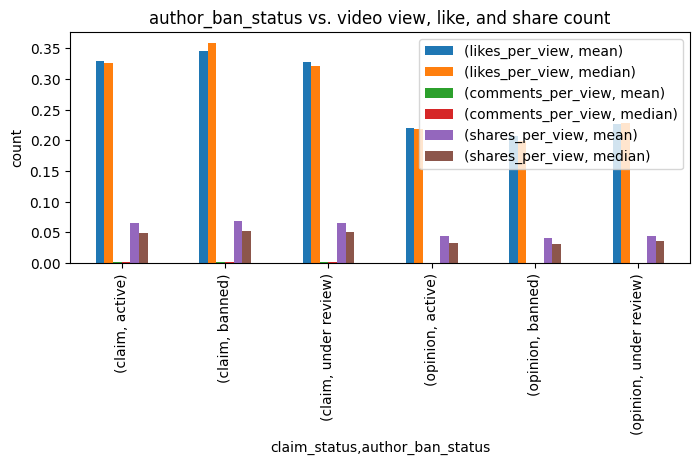

In [44]:
g2.plot(kind='bar', figsize=(8,3))
plt.ylabel('count')
plt.legend()
plt.title('author_ban_status vs. video view, like, and share count');

We know that videos by banned authors and those under review tend to get far more views, likes, and shares than videos by non-banned authors. However, *when a video does get viewed*, its engagement rate is less related to author ban status and more related to its claim status.

Also, we know that claim videos have a higher view rate than opinion videos, but this tells us that claim videos also have a higher rate of likes on average, so they are more favorably received as well. Furthermore, they receive more engagement via comments and shares than opinion videos.

For claim videos, banned authors have slightly higher likes/view and shares/view rates than active authors or those under review. However, for opinion videos, active authors and those under review both get higher engagement rates than banned authors in all categories.

Returning to the purpose of this analysis, at this point in the investigation it seems that engagement level is strongly correlated with claim status, and this should be a focus of further inquiry.

## Conclusion

After looking at the dataset, the two variables that are most likely to help build a predictive model are `claim_status` and `author_ban_status`. Those two variables are most likely to be helpful because those variables denote claims and opinions. That way, we can create a classification model to differentiate the two variables, as instructed from the employer.

For most columns, the mean is larger than the median, so the data is right-skewed. Therefore, it is recommended to consider applying a variable transformation, such as taking logarithms, prior to modeling.